In [1]:
%matplotlib inline
import xarray as xr
import zremap

In [2]:
pth = '/glade/scratch/mclong/archive/g.e21a01d.G1850ECOIAF.T62_g17.extraterr-fe.001/ocn/hist'
file = 'g.e21a01d.G1850ECOIAF.T62_g17.extraterr-fe.001.pop.h.0240-09.nc'

ds = xr.open_dataset(f'{pth}/{file}',decode_times=False, decode_coords=False)
ds = ds.drop([v for v in ds.variables if v not in ['DIC','PD', 'KMT', 'z_t', 'dz','time','time_bounds']])
ds.info()

xarray.Dataset {
dimensions:
	nlat = 384 ;
	nlon = 320 ;
	time = 1 ;
	z_t = 60 ;

variables:
	float64 time(time) ;
		time:long_name = time ;
		time:units = days since 0000-01-01 00:00:00 ;
		time:bounds = time_bound ;
		time:calendar = noleap ;
	float32 z_t(z_t) ;
		z_t:long_name = depth from surface to midpoint of layer ;
		z_t:units = centimeters ;
		z_t:positive = down ;
		z_t:valid_min = 500.0 ;
		z_t:valid_max = 537500.0 ;
	float32 dz(z_t) ;
		dz:long_name = thickness of layer k ;
		dz:units = centimeters ;
	float64 KMT(nlat, nlon) ;
		KMT:long_name = k Index of Deepest Grid Cell on T Grid ;
		KMT:coordinates = TLONG TLAT ;
	float32 DIC(time, z_t, nlat, nlon) ;
		DIC:long_name = Dissolved Inorganic Carbon ;
		DIC:units = mmol/m^3 ;
		DIC:coordinates = TLONG TLAT z_t time ;
		DIC:grid_loc = 3111 ;
		DIC:cell_methods = time: mean ;
	float32 PD(time, z_t, nlat, nlon) ;
		PD:long_name = Potential Density Ref to Surface ;
		PD:units = gram/centimeter^3 ;
		PD:coordinates = TLONG TLAT z

In [3]:
SIGMA = (ds.PD - 1.)*1000.
SIGMA.encoding = ds.PD.encoding
SIGMA

<xarray.DataArray 'PD' (time: 1, z_t: 60, nlat: 384, nlon: 320)>
array([[[[nan, ..., nan],
         ...,
         [nan, ..., nan]],

        ...,

        [[nan, ..., nan],
         ...,
         [nan, ..., nan]]]], dtype=float32)
Coordinates:
  * time     (time) float64 8.787e+04
  * z_t      (z_t) float32 500.0 1500.0 2500.0 ... 487508.34 512502.8 537500.0
Dimensions without coordinates: nlat, nlon

In [4]:
sigma_edges = zremap.sigma_coord_edges(sigma_start=24.475, sigma_stop=26.975,
          sigma_delta=0.05)

sigma_edges

array([24.475, 24.525, 24.575, 24.625, 24.675, 24.725, 24.775, 24.825,
       24.875, 24.925, 24.975, 25.025, 25.075, 25.125, 25.175, 25.225,
       25.275, 25.325, 25.375, 25.425, 25.475, 25.525, 25.575, 25.625,
       25.675, 25.725, 25.775, 25.825, 25.875, 25.925, 25.975, 26.025,
       26.075, 26.125, 26.175, 26.225, 26.275, 26.325, 26.375, 26.425,
       26.475, 26.525, 26.575, 26.625, 26.675, 26.725, 26.775, 26.825,
       26.875, 26.925, 26.975, 27.025])

In [5]:
%%time
dss = zremap.z_to_sigma(ds, SIGMA, sigma_edges, 'z_t', 'dz', 'KMT')
dss.info()

{'time': <xarray.DataArray 'time' (time: 1)>
array([87873.])
Coordinates:
  * time     (time) float64 8.787e+04
Attributes:
    long_name:  time
    units:      days since 0000-01-01 00:00:00
    bounds:     time_bound
    calendar:   noleap, 'sigma': <xarray.DataArray (sigma: 51)>
array([24.5 , 24.55, 24.6 , 24.65, 24.7 , 24.75, 24.8 , 24.85, 24.9 , 24.95,
       25.  , 25.05, 25.1 , 25.15, 25.2 , 25.25, 25.3 , 25.35, 25.4 , 25.45,
       25.5 , 25.55, 25.6 , 25.65, 25.7 , 25.75, 25.8 , 25.85, 25.9 , 25.95,
       26.  , 26.05, 26.1 , 26.15, 26.2 , 26.25, 26.3 , 26.35, 26.4 , 26.45,
       26.5 , 26.55, 26.6 , 26.65, 26.7 , 26.75, 26.8 , 26.85, 26.9 , 26.95,
       27.  ])
Dimensions without coordinates: sigma
Attributes:
    long_name:  sigma_theta
    units:      kg m$^{-3}$}
xarray.Dataset {
dimensions:
	nlat = 384 ;
	nlon = 320 ;
	sigma = 51 ;
	time = 1 ;

variables:
	float64 time(time) ;
		time:long_name = time ;
		time:units = days since 0000-01-01 00:00:00 ;
		time:bounds = tim

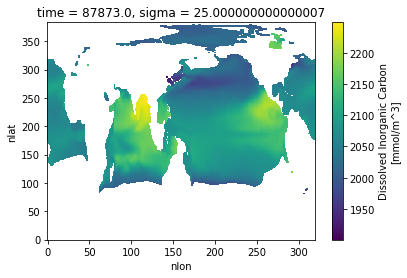

In [6]:
dss.DIC.isel(sigma=10).plot()